<a href="https://colab.research.google.com/github/ankp6737/machinelearning/blob/main/Time_Series_AutoRegression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Forecasting Product Sales Time Series Data using Autoregression

Autoregression modeling is a modeling technique used for time series data that assumes linear continuation of the series so that previous values in the time series can be used to predict futures values. 

It seems to be like linear regression with some additional features of 'lag variable'

**Linear regression Model**

y = a + b*X

In linear regression model given an input x we use to predict the value of y by optimizing the parameters a and b during the training process.  

**Autoregression Model**

In autoregression model we use previous data to predict future data points but with multiple lag variables.

y = a + b1*X(t-1) + b2*X(t-2) + b3*X(t-3)

Here a, b1, b2 and b3 are found during the training process and X(t-1), X(t-2) and X(t-3) are input at previous times in the dataset


Assumptions:

Data is stationary. A time series is stationary if is mean (and/or variance) is constant over time. 







##Import Libraries

In [ ]:
import pandas as pd  #import library that helps in data manipulation and analysis. This library will be referred as pd in future program
import numpy as np  #import library that is used for working with arrays
%matplotlib inline   
import matplotlib.pyplot as plt  #import library for plotting graphs

##Load the Dataset

Its a product sales data that contains the product sales count collected monthly from year 1992 to 2019

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Product_Sales.csv',index_col='DATE',parse_dates=True) #read the dataset into the variable df and making 'Date' column as index and setting parsing date to true for faster parsing of datatime format
df.index.freq = 'MS'  #to generate series from month starting
df.head()   #return first few rows of the dataset

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


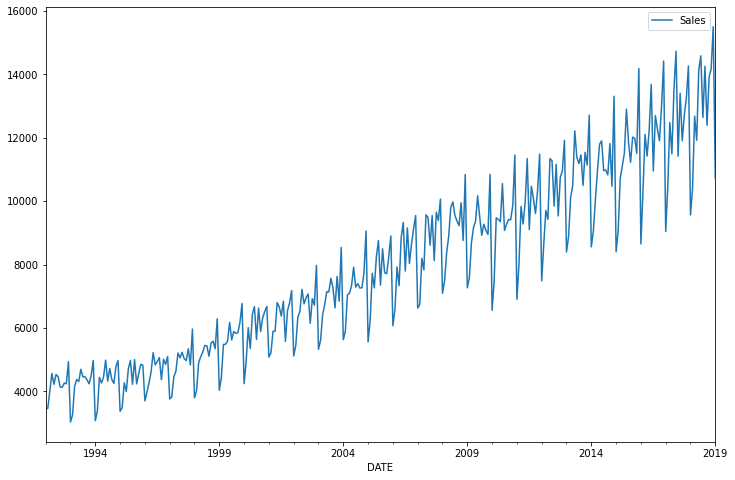

In [ ]:
df.columns = ['Sales']      #give meaningful name to the column of sales
df.plot(figsize=(12,8))     #plot the timeseries data

##Check for Correlation

This is the first assumption for autoregression models. A visual method for checking correlation is to use pandas lag_plot() function to see how well the values of the original sales data are correlated with each other. 

A lag plot is used to help evaluate whether the values in a dataset or time series are random. If the data are
random, the lag plot will exhibit no identifiable pattern. If the data are not random, the lag plot will demonstrate a
clearly identifiable pattern. The type of pattern can aid the user in identifying the non-random structure in the
data. Lag plots can also help to identify outliers. 

Data with autocorrelation gives rise to lag plots with linear patterns that follow the diagonal. As the level of
autocorrelation increases, the points cluster more tightly along the diagonal.

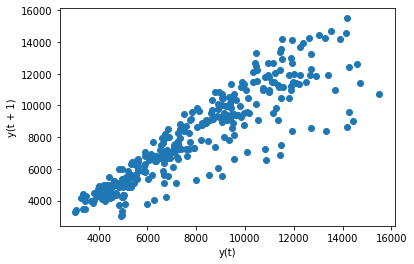

In [ ]:
pd.plotting.lag_plot(df['Sales'])       #plotting the lag_plot graph for the time series data

Autocorrelation measures a set of current values against a set of past values to see if they correlate. It is heavily used in time series analysis and forecasting.

A plot of the autocorrelation of a time series is called the Autocorrelation Function (ACF).


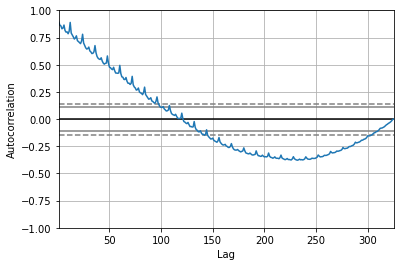

In [ ]:
pd.plotting.autocorrelation_plot(df['Sales'])

From the plot above, we can see there’s some significant correlation at t=12 (roughly) with significant decline in correlation after that timeframe.  Since we are looking at monthly sales data, this seems to make sense with correlations falling off at the start of the new fiscal year.

We can test this concept by checking the pearson correlation of the sales data with lagged values using the approach below.

In [ ]:
df['Sales'].corr(df['Sales'].shift(12))

0.9899935802708764

##Stationarity of Data

Looking at that chart that we have a non-stationary dataset due to the increasing trend from lower left to upper right as well as some seasonality. There are plenty of tests that we can do to determine if seasonality / trend exist a time series but here we will use the seasonal_decompose() method.

A time series can be thought of as being made up of 3 components:
A seasonal component
A trend component
A noise component.

The Seasonal component
The seasonal component explains the periodic ups and downs.

The Trend component
The Trend component refers to the pattern in the data that spans across seasonal periods.

The Noise component
The noise or the random component is what remains behind when we separate out seasonality and trend from the time series. Noise is the effect of factors that we do not know, or which we cannot measure. 

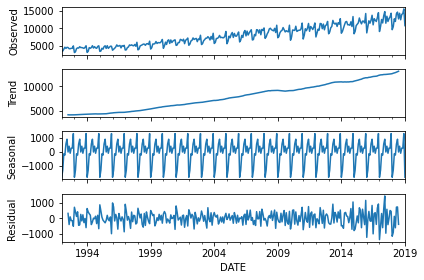

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose #importing seasonal decompose from stats model to decompose the time series data
decomposed = seasonal_decompose(df['Sales'], model='additive')  #seasonal decomposing using the additive model
x = decomposed.plot() #See note below about this

##Differenciating the data

Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

The differenced series is the change between consecutive observations in the original series, and can be written as

y(diff)=y(t)-y(t-1)

The differenced series will have only t-1 values, since it is not possible to calculate a difference y′ for the first observation.



In [ ]:
df['stationary']=df['Sales'].diff() #differentiating the data to get a stationary data

Plotting this new set of data gets us the following plot.

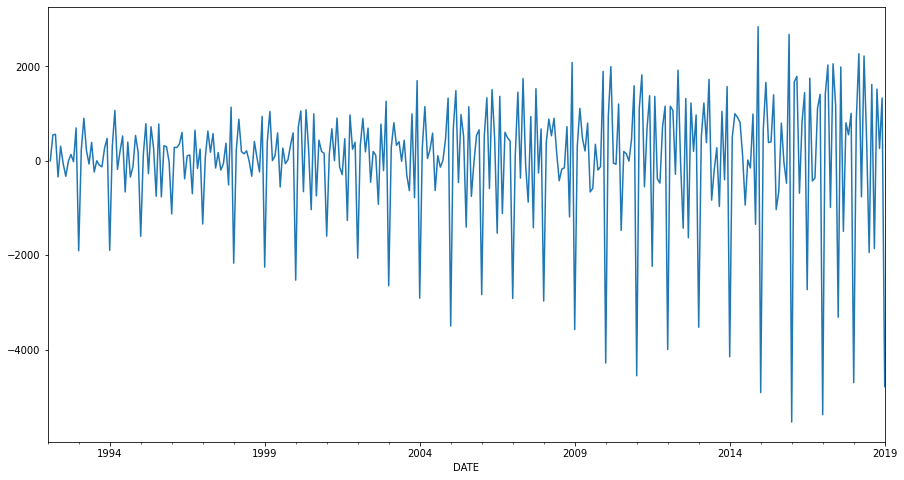

In [ ]:
df['stationary'].plot(figsize=(15,8))   #ploting the differentiated data


Running seasonal_decompose() on this new data gives us:

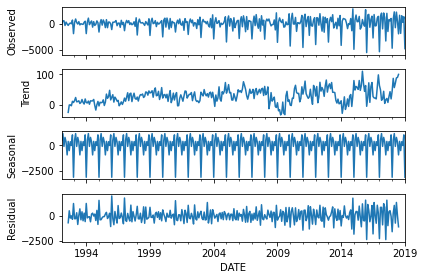

In [ ]:
decomposed = seasonal_decompose(df.iloc[1:,1:2], model='additive')
x = decomposed.plot()

##AutoRegression Model

Now that we know our data fits our assumptions, we’ll use the AR() model in statsmodels library.

We can use this model by first creating the model AR() and then calling fit() to train it on our dataset. 

Once fit, we can use the model to make a prediction by calling the predict() function for a number of observations in the future. This creates 12-month forecast.

###Train the model

In [ ]:
from statsmodels.tsa.ar_model import AR   #import library for autoregression model

#create train/test datasets
X = df['stationary'].dropna()
#print(X[1:len(X)-12])
train_data = X[1:len(X)-12]
test_data = X[len(X)-12:]

#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

In [ ]:
print('The lag value chose is: %s' % model_fitted.k_ar) #printing the auto lag value choosen by the model

The lag value chose is: 16


In [ ]:
print('The coefficients of the model are:\n %s' % model_fitted.params)  #printing other parameters of the model

The coefficients of the model are:
 const             105.250887
L1.stationary      -1.083881
L2.stationary      -0.911252
L3.stationary      -0.378079
L4.stationary      -0.375317
L5.stationary      -0.386638
L6.stationary      -0.348504
L7.stationary      -0.374277
L8.stationary      -0.364960
L9.stationary      -0.342274
L10.stationary     -0.386841
L11.stationary     -0.325397
L12.stationary      0.641456
L13.stationary      0.720203
L14.stationary      0.557642
L15.stationary     -0.022443
dtype: float64


###Prediction using the model

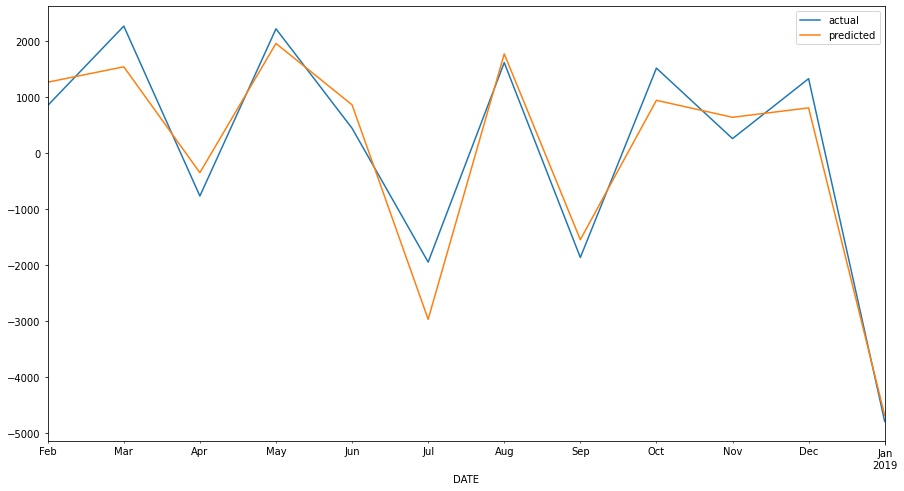

In [ ]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# create a comparison dataframe
compare_df = pd.concat(
    [df['stationary'].tail(12),
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})

#plot the two values
compare_df.plot(figsize=(15,8))

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(test['Sales'], test['Predictions'])
r2  